In [56]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm


In [57]:
isic_metadata = pd.read_csv('../datasets/ISIC_2019_Training_GroundTruth.csv')
ham_metadata = pd.read_csv('../datasets/HAM10000_metadata.csv')

In [58]:
id_col = 'image'  # Assuming 'image' is the ID column
category_cols = [col for col in isic_metadata.columns if col != id_col]

isic_unpivoted = pd.melt(
    isic_metadata,
    id_vars=[id_col],
    value_vars=category_cols,
    var_name='category',
    value_name='present'
)
isic_unpivoted = isic_unpivoted[isic_unpivoted['present'] == 1]
isic_unpivoted = isic_unpivoted.drop(columns=['present'])
isic_unpivoted.reset_index(drop=True, inplace=True)

In [59]:
joint_df = pd.merge(left=isic_unpivoted, right=ham_metadata, left_on='image', right_on='image_id', how='inner')

In [60]:
match_count = 0


for i, row in tqdm(joint_df.sample(1000).iterrows()):
    ham_path = f'../datasets/HAM10000_images_combined/{row["image_id"]}.jpg'
    isic_path = f'../datasets/ISIC_2019/{row["image"]}.jpg'

    ham_img = plt.imread(ham_path)
    isic_img = plt.imread(isic_path)

    if ham_img.shape == isic_img.shape:
        dist = np.linalg.norm(ham_img - isic_img)
        if dist < 1e-5: 
            match_count += 1

print(f'Percentage of matching images: {match_count / 1000 * 100:.2f}%')
        

1000it [00:12, 80.99it/s]

Percentage of matching images: 100.00%


1000

In [73]:
isic_train = pd.read_csv('../datasets/ISIC_2019_Training_GroundTruth.csv')
isic_test = pd.read_csv('../datasets/ISIC_2019_Test_GroundTruth.csv')

id_col = 'image'  # Assuming 'image' is the ID column
category_cols = [col for col in isic_train.columns if col != id_col]

isic_train_unpivoted = pd.melt(
    isic_train,
    id_vars=[id_col],
    value_vars=category_cols,
    var_name='category',
    value_name='present'
)
isic_train_unpivoted = isic_train_unpivoted[isic_train_unpivoted['present'] == 1]
isic_train_unpivoted = isic_train_unpivoted.drop(columns=['present'])
isic_train_unpivoted.reset_index(drop=True, inplace=True)
isic_train_unpivoted['dataset'] = 'train'


category_cols = [col for col in isic_test.columns if col not in ['image', 'score_weight', 'validation_weight']]


isic_test_unpivoted = pd.melt(
    isic_test,
    id_vars=[id_col],
    value_vars=category_cols,
    var_name='category',
    value_name='present'
)
isic_test_unpivoted = isic_test_unpivoted[isic_test_unpivoted['present'] == 1]
isic_test_unpivoted = isic_test_unpivoted.drop(columns=['present'])
isic_test_unpivoted.reset_index(drop=True, inplace=True)
isic_train_unpivoted['dataset'] = 'test'

In [74]:
isic_combined = pd.concat([isic_train_unpivoted, isic_test_unpivoted], ignore_index=True)

In [75]:
isic_test

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,score_weight,validation_weight
0,ISIC_0034321,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,ISIC_0034322,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,ISIC_0034323,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,ISIC_0034324,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,ISIC_0034325,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8233,ISIC_0073236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8234,ISIC_0073243,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8235,ISIC_0073250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8236,ISIC_0073252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<Axes: xlabel='category'>

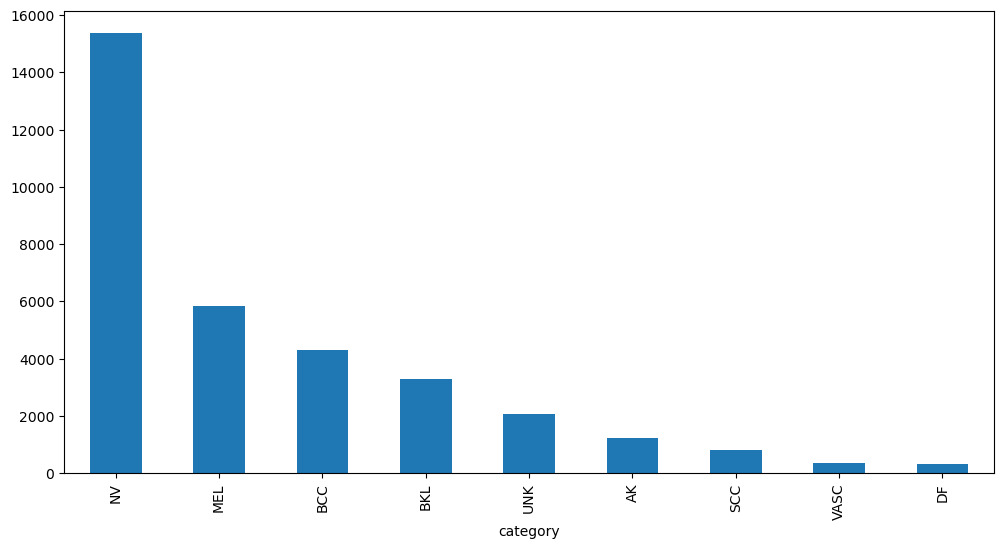

In [76]:
isic_combined['category'].value_counts().plot(kind='bar', figsize=(12, 6))

In [81]:
isic_train_unpivoted['category'].value_counts()

category
NV      12875
MEL      4522
BCC      3323
BKL      2624
AK        867
SCC       628
VASC      253
DF        239
Name: count, dtype: int64

In [80]:
isic_test_unpivoted['category'].value_counts()

category
NV      2495
UNK     2047
MEL     1327
BCC      975
BKL      660
AK       374
SCC      165
VASC     104
DF        91
Name: count, dtype: int64